# Q1 Preprocessing

In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt

## Dummy Variable, Drop null, Drop columns

In [50]:
df = pd.read_csv("hepatitis_csv.csv")

In [51]:
# Dummy variables
df = df.replace({True: 1, False: 0})
df = df.replace({"male": 0, "female": 1})
df = df.replace({"live": 1, "die": 0})

#Drop null
df = df.dropna()
df

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
5,34,1,1.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.9,95.0,28.0,4.0,75.0,0,1
10,39,1,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.3,78.0,30.0,4.4,85.0,0,1
11,32,1,1.0,1,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,59.0,249.0,3.7,54.0,0,1
12,41,1,1.0,1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.9,81.0,60.0,3.9,52.0,0,1
13,30,1,1.0,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.2,57.0,144.0,4.9,78.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,45,1,1.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.3,85.0,44.0,4.2,85.0,1,1
143,49,1,0.0,0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.4,85.0,70.0,3.5,35.0,1,0
145,31,1,0.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.2,75.0,173.0,4.2,54.0,1,1
153,53,0,0.0,0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.5,81.0,19.0,4.1,48.0,1,1


<AxesSubplot: >

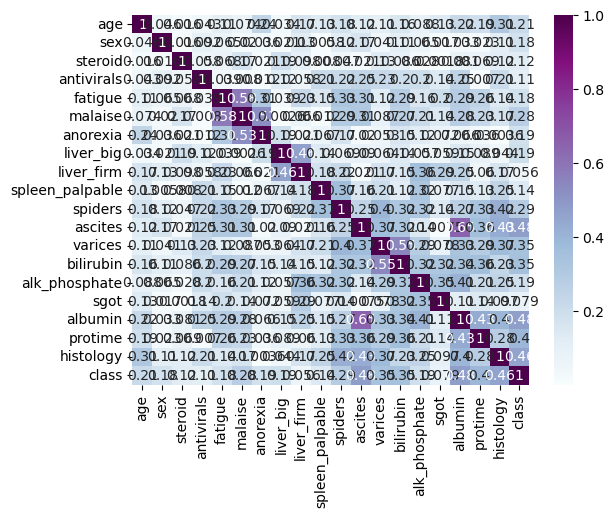

In [52]:
#Dropping columns
corr = df.corr()
corr = abs(corr)
sns.heatmap(corr, annot = True, cmap = "BuPu")

In [53]:
corrclass = corr['class']
droppedcol = corrclass[corrclass < 0.2].index
df = df.drop(columns=droppedcol)
df

,age,malaise,spiders,ascites,varices,bilirubin,albumin,protime,histology,class
5,34,0.0,0.0,0.0,0.0,0.9,4.0,75.0,0,1
10,39,0.0,0.0,0.0,0.0,1.3,4.4,85.0,0,1
11,32,0.0,1.0,0.0,0.0,1.0,3.7,54.0,0,1
12,41,0.0,0.0,0.0,0.0,0.9,3.9,52.0,0,1
13,30,0.0,0.0,0.0,0.0,2.2,4.9,78.0,0,1
...,...,...,...,...,...,...,...,...,...,...
139,45,0.0,0.0,0.0,0.0,1.3,4.2,85.0,1,1
143,49,1.0,1.0,0.0,0.0,1.4,3.5,35.0,1,0
145,31,0.0,0.0,0.0,0.0,1.2,4.2,54.0,1,1
153,53,0.0,1.0,0.0,1.0,1.5,4.1,48.0,1,1


## Train Test split & Numpy

In [9]:
#Train test split
train = int(0.8 * df.shape[0])
traindata = df.iloc[:train]
testdata = df.iloc[train:]

In [10]:
#Convert to numpy
traindata = traindata.to_numpy()
testdata = testdata.to_numpy()

#  Q2 Linear Regression

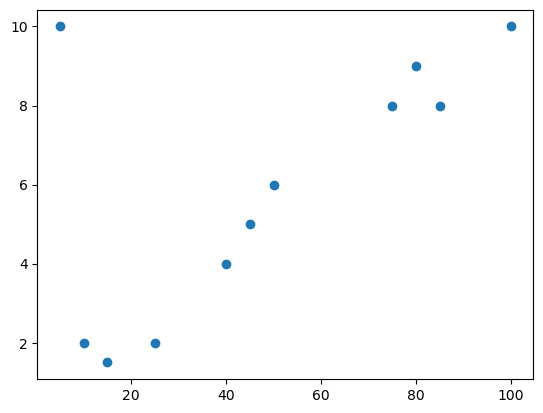

In [107]:
x = [15, 25, 40, 45, 80, 85, 10, 5, 50, 75, 100]
y = [1.5, 2, 4, 5, 9, 8, 2, 10, 6, 8, 10]
# x = [15, 20, 40, 50, 90, 80, 20, 10, 60, 80, 100]
x = np.array(x)
y = np.array(y)

plt.scatter(x, y)
plt.show()

In [84]:
xm = x - x.mean()
ym = y - y.mean()

In [85]:
ym

array([-4.45454545, -3.95454545, -1.95454545, -0.95454545,  3.04545455,
        2.04545455, -3.95454545,  4.04545455,  0.04545455,  2.04545455,
        4.04545455])

In [86]:
b1 = (np.sum(xm*ym) / np.sum(xm*xm))
b0 = y.mean() - b1 * x.mean()
ypred = b1*x + b0
ypred

array([3.89375788, 4.51481715, 5.44640605, 5.75693569, 7.93064313,
       8.24117276, 3.58322825, 3.27269861, 6.06746532, 7.62011349,
       9.17276166])

In [89]:
b0

2.9621689785624215

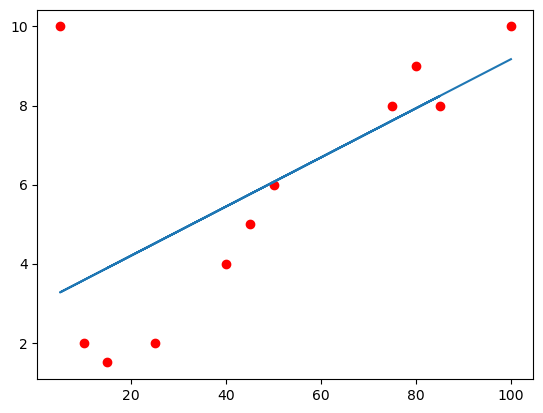

In [49]:
plt.plot(x, ypred)
plt.scatter(x, y, color='red')
plt.show()

In [109]:
# Calculus method
xn = np.array([[len(x), np.sum(x)],
              [ np.sum(x), np.sum(x*x)]])
yn = np.array([np.sum(x), np.sum(x*y)])
b = np.dot(np.linalg.inv(xn), yn)
ypred = b[0] + b[1]*x
ypred

array([114.79581757,  94.7203657 ,  64.60718789,  54.56946196,
       -15.69461959, -25.73234552, 124.83354351, 134.87126944,
        44.53173602,  -5.65689365, -55.84552333])

## Additional

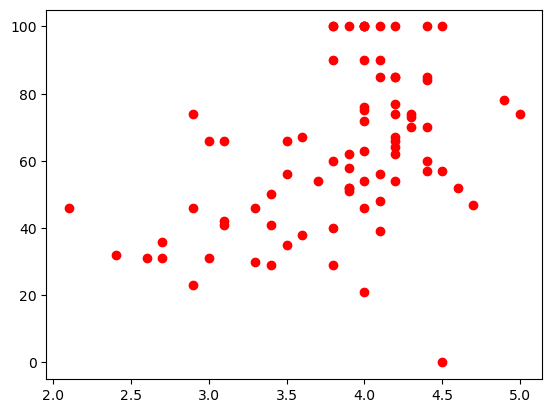

In [91]:
plt.scatter(df['albumin'], df['protime'], color='red')
plt.show()

In [92]:
x, y = df['albumin'], df['protime']

xm = x - x.mean()
ym = y - y.mean()

In [93]:
b1 = (np.sum(xm*ym) / np.sum(xm*xm))
b0 = y.mean() - b1 * x.mean()
ypred = b1*x + b0
ypred

5      65.273441
10     72.341452
11     59.972434
12     63.506439
13     81.176464
         ...    
139    68.807447
143    56.438429
145    68.807447
153    67.040444
154    49.370419
Name: albumin, Length: 80, dtype: float64

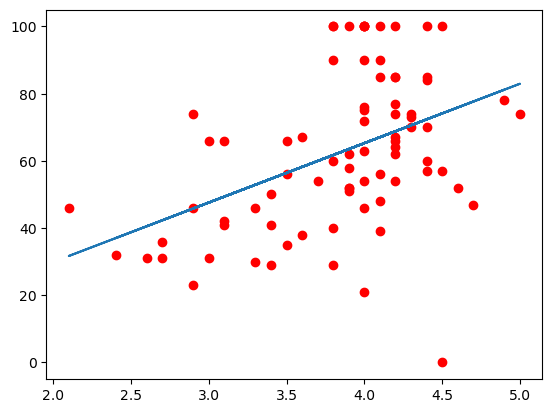

In [94]:
plt.plot(x, ypred)
plt.scatter(x, y, color='red')
plt.show()

In [103]:
rmse = np.mean((abs(y - ypred)))
rmse

16.566413325710478